In [40]:
import base64
import boto3
import json
from PIL import Image

modelId = "us.amazon.nova-pro-v1:0"
accept = "application/json"
contentType = "application/json"
bedrock_rt = boto3.client("bedrock-runtime", region_name="us-east-1") 

def encode_image(image_path):
    global width, height
    with Image.open(image_path) as img:  # PIL의 Image로 이미지 열기
        width, height = img.size         # 이미지 크기 가져오기
        print(width, height)
        img.show()
        # RGBA에서 RGB로 변환 (투명도 제거)
        if img.mode in ('RGBA', 'LA'):
            background = Image.new('RGB', img.size, (255, 255, 255))
            background.paste(img, mask=img.split()[-1])
            img = background
            
        # 이미지를 바이트로 변환하고 base64로 인코딩
        with open(image_path, 'rb') as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

def get_completion(messages):
    prompt_config = {
        "schemaVersion": "messages-v1",
        "inferenceConfig": {
            "max_new_tokens": 2048,
            "top_p": 0.9,
            "top_k": 20,
            "temperature": 0.7,
        },
        "messages": messages
    }
    body = json.dumps(prompt_config)
    response = bedrock_rt.invoke_model(
        body=body, modelId=modelId
    )
    response_body = json.loads(response["body"].read())
    results = response_body["output"]["message"]["content"][0]["text"]
    return results

280 210


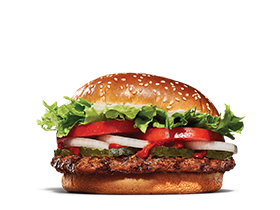

이미지의 크기는 280x210 픽셀이며, 전체 사이즈는 58,800 픽셀이다. 이 이미지는 햄버거를 그린 그림이다. 햄버거는 샐러드와 케첩, 피클로 구성되어 있다.


In [41]:
# Prepare the image
image_path = "./images/whopper.png"
base64_image = encode_image(image_path)

messages = [
    {
        "role": 'user',
        "content": [
            {
                "image": {
                    "format": "png",
                    "source": {"bytes": base64_image},
                }
            },        
            {
                "text": f"입력된 이미지의 크기는 {width}x{height} 픽셀이야. 이 이미지의 전체 사이즈, 대상체는 몇 픽셀인지, 그리고 무엇인지 설명해줘"
            }
        ]
    }
]

prompt1 = get_completion(messages)
print(prompt1)

560 420


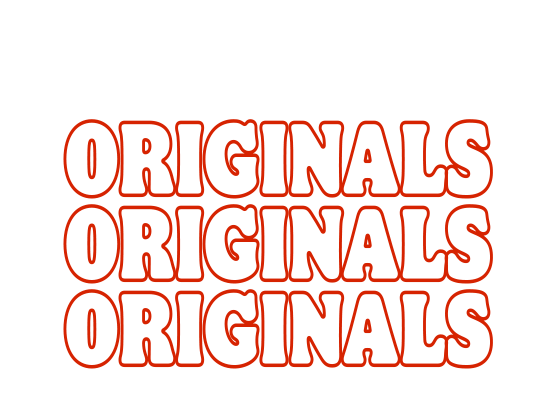

이미지는 560x420 픽셀의 크기로, 주로 빨간색과 흰색의 두 가지 색상을 사용하여 디자인되었습니다. 이미지의 주요 대상체는 빨간색 색상으로 그려진 세 개의 막대입니다. 이 막대들은 거의 전체 이미지의 너비를 차지하고 있으며, 각 막대의 높이는 이미지 높이의 약 1/3을 차지합니다. 따라서 각 막대의 크기는 대략 560x140 픽셀입니다. 이러한 디자인은 단순하면서도 강렬한 시각적 효과를 제공하며, 빨간색 막대들은 중요한 정보나 강조할 부분을 나타내는 데 사용될 수 있습니다.


In [42]:
# Prepare the image
image_path = "./images/background1.png"
base64_image = encode_image(image_path)

messages = [
    {
        "role": 'user',
        "content": [
            {
                "image": {
                    "format": "png",
                    "source": {"bytes": base64_image},
                }
            },        
            {
                "text": f"입력된 이미지의 크기는 {width}x{height} 픽셀이야. 이 이미지의 전체 사이즈, 대상체는 몇 픽셀인지, 그리고 무엇인지 설명해줘"
            }
        ]
    }
]

prompt2 = get_completion(messages)
print(prompt2)

In [76]:
messages = [
    {
        "role": 'user',
        "content": [   
            {
                "text": f"너는 광고 이미지 제작 전문가야. 광고 상품이 눈에 잘 들어오도록 이미지를 제작해야해. 배경 대비 광고 대상 물체 이미지가 너무 작으면 조금 확대해줘. 하지만 배경을 너무 많이 가리지는 말아. 광고 대상 물체 이미지는 다음과 같아. {prompt1} 그리고, 배경 이미지는 다음과 같아. {prompt2} 배경 이미지에 광고 대상 물체 이미지를 합성할건데, 대상 물체의 사이즈를 어떻게 조절해야 하고, 어느 좌표 위치에 합성해야 광고 이미지로 적합할지 제안해줘. 합성 위치는 대상체의 왼쪽 상단 모서리가 배경 이미지의 어느 좌표에 위치해야 하는지로 알려줘. 응답의 가장 마지막에는 다음의 형식으로 출력해줘. width = 사이즈 조절 목표 width값, height = 사이즈 조절 목표 height값, location_x = 합성 위치 width 좌표값, location_y = 합성 위치 height 좌표값"
            }
        ]
    }
]

prompt3 = get_completion(messages)
print(prompt3)

광고 이미지를 효과적으로 만들기 위해서는 광고 대상 물체 이미지가 충분히 눈에 띄면서도 배경을 너무 많이 가리지 않도록 조절해야 합니다. 다음은 제안된 조정 사항입니다.

### 사이즈 조절
현재 광고 대상 물체 이미지의 크기는 280x210 픽셀입니다. 배경 이미지의 크기는 560x420 픽셀이므로, 대상 물체 이미지를 약간 확대하여 배경에 더 잘 어울리도록 조절할 수 있습니다. 

햄버거 이미지를 배경에 비례하여 확대하면 다음과 같은 크기가 됩니다:
- 너비: \(280 \times \frac{560}{280} = 560\) 픽셀
- 높이: \(210 \times \frac{420}{210} = 420\) 픽셀

하지만 이렇게 하면 배경을 너무 많이 가리게 되므로, 조금 더 작은 크기로 조절하는 것이 좋습니다. 예를 들어, 너비와 높이를 각각 배경의 절반 정도로 조절할 수 있습니다:
- 너비: \(560 \times 0.6 = 336\) 픽셀
- 높이: \(420 \times 0.6 = 252\) 픽셀

### 합성 위치
배경 이미지의 중앙에 대상 물체 이미지를 배치하는 것이 가장 눈에 잘 띄고 균형 잡힌 구도를 만들 수 있습니다. 

합성 위치를 계산하면 다음과 같습니다:
- 너비 중앙: \((560 - 336) / 2 = 112\) 픽셀
- 높이 중앙: \((420 - 252) / 2 = 84\) 픽셀

따라서 대상 물체 이미지의 왼쪽 상단 모서리는 배경 이미지의 (112, 84) 위치에 위치해야 합니다.

### 최종 제안
width = 336, height = 252, location_x = 112, location_y = 84


In [77]:
import re

# Extract all the numerical values using regular expressions
text = prompt3

# Find width and height
width_pattern = r"width = (\d+\.?\d*)"
height_pattern = r"height = (\d+\.?\d*)"
location_x_pattern = r"location_x = (\d+\.?\d*)"
location_y_pattern = r"location_y = (\d+\.?\d*)"

# Extract values
width = float(re.search(width_pattern, text).group(1))  # 350
height = float(re.search(height_pattern, text).group(1))  # 262.5
location_x = float(re.search(location_x_pattern, text).group(1))  # 105
location_y = float(re.search(location_y_pattern, text).group(1))  # 0

# Store in a dictionary if needed
image_params = {
    'width': width,
    'height': height,
    'location_x': location_x,
    'location_y': location_y
}

# Print to verify
print("Width:", width)
print("Height:", height)
print("Location X:", location_x)
print("Location Y:", location_y)

Width: 336.0
Height: 252.0
Location X: 112.0
Location Y: 84.0


배경 이미지


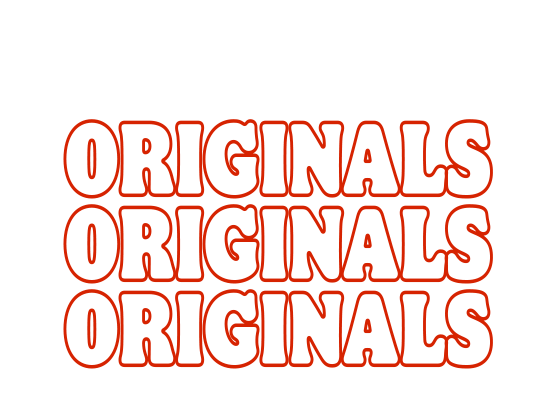

상품 이미지


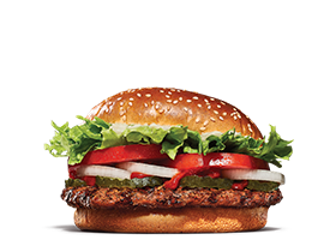

최종 이미지


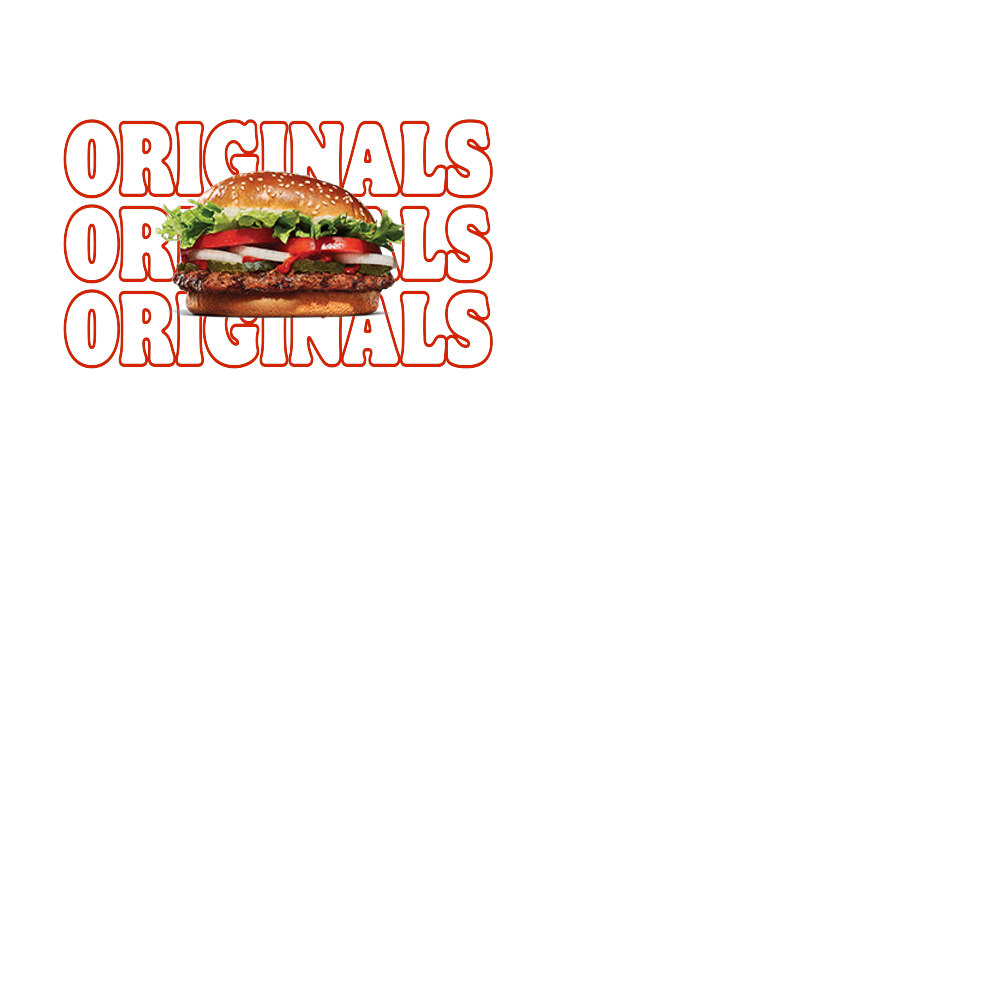

In [79]:
from PIL import Image
import numpy as np
#import cv2

# 이미지 로드
product_image = Image.open("./images/whopper.png")
background_image = Image.open("./images/background1.png")

width_target = int(width)
height_target = int(height)

print("배경 이미지")
background_image.show()

product_image = product_image.resize((width_target, height_target))
print("상품 이미지")
product_image.show()

# 두 이미지가 RGBA 모드인지 확인하고, 아니라면 변환
if product_image.mode != 'RGBA':
    product_image = product_image.convert('RGBA')
if background_image.mode != 'RGBA':
    background_image = background_image.convert('RGBA')

# 새로운 투명한 이미지 생성
result = Image.new('RGBA', (1000, 1000), (0, 0, 0, 0))
    
# 첫 번째 이미지 붙이기
result.paste(background_image, (0, 0), background_image)
    
# 두 번째 이미지 겹치기
result.paste(product_image, (int(location_x), int(location_y)), product_image)

print("최종 이미지")
result.show()
